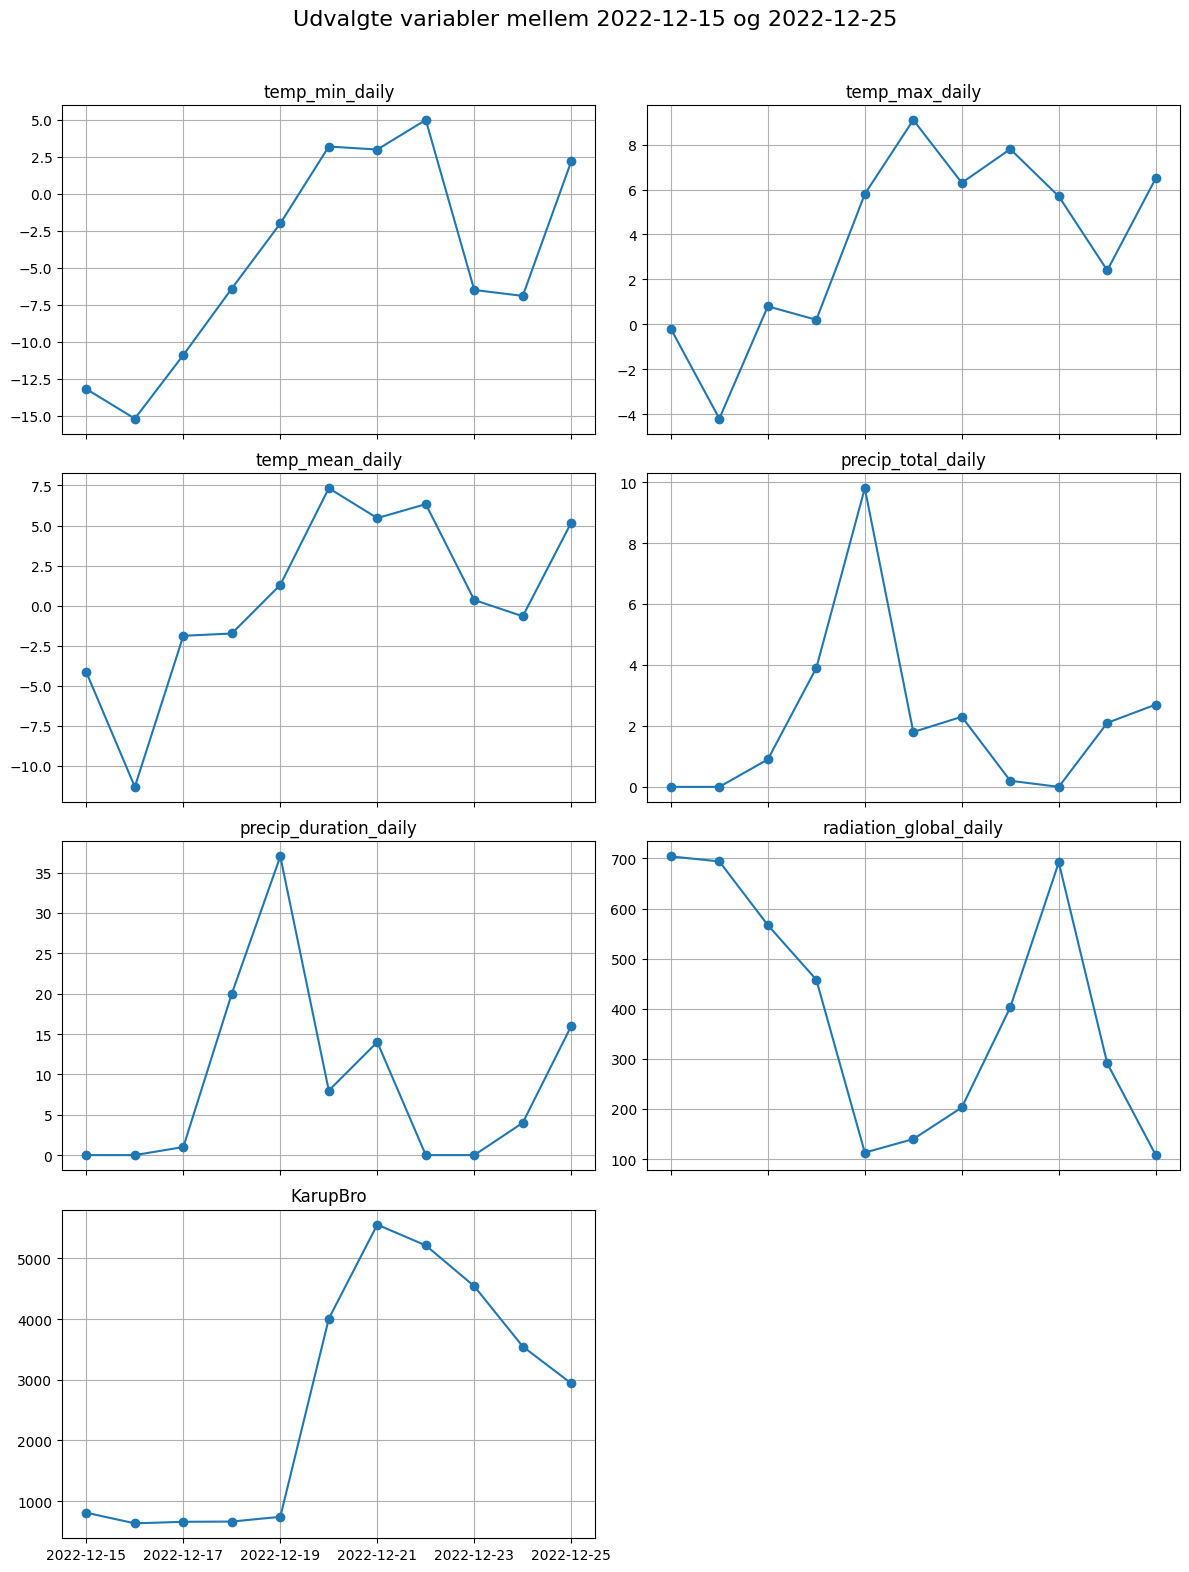

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Paths (samme som i dit oprindelige script)
DATA_PATH          = '/Users/nicolaigarderhansen/Desktop/Bachelorprojekt/Forecasting-water-inflow/Data loading and handling/Cleaned data etc./data_cleaned_and_interpolated.csv'
VANDSTAND_PATH     = '/Users/nicolaigarderhansen/Desktop/Bachelorprojekt/Forecasting-water-inflow/Data loading and handling/Raw data/28.02_Vandstand (DMP)_Dag.csv'

# Config
date_col   = 'time'
# Vi inkluderer nu kun de ønskede kolonner + 'KarupBro'
plot_cols = [
    'temp_min_daily',
    'temp_max_daily',
    'temp_mean_daily',
    'precip_total_daily',
    'precip_duration_daily',
    'radiation_global_daily',
    'KarupBro'
]

# 1) Load cleaned & interpolated data
df = pd.read_csv(DATA_PATH, parse_dates=[date_col])
df.sort_values(date_col, inplace=True)
df.set_index(date_col, inplace=True)

# 2) Funktion til at loade daglige vandstandstal (hvis du stadig skal bruge dem til noget senere)
def load_daily_vandstand(path):
    with open(path, encoding='latin1') as f:
        for i, line in enumerate(f):
            if line.strip().startswith('Dato (DK normaltid)'):
                header_row = i
                break

    vand = pd.read_csv(
        path,
        sep=';',
        skiprows=header_row,
        header=0,
        usecols=[0, 1],
        encoding='latin1',
        engine='python'
    )
    vand.columns = ['date', 'water_level']
    vand['date'] = pd.to_datetime(vand['date'], dayfirst=True)
    vand.set_index('date', inplace=True)
    return vand

# 3) Load og merge vandstand (valgfrit, da vi ikke plotter vandstand her)
vand_df = load_daily_vandstand(VANDSTAND_PATH)
df = df.join(vand_df['water_level'], how='left')

# 4) Filtrer tidsrække mellem 2022-12-15 og 2022-12-25
start, end = '2022-12-15', '2022-12-25'
df_subset = df.loc[start:end]

# 5) Plot kun de ønskede kolonner
n = len(plot_cols)
ncols = 2
nrows = int(np.ceil(n / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4*nrows), sharex=True)
axes = axes.flatten()

for i, col in enumerate(plot_cols):
    axes[i].plot(df_subset.index, df_subset[col], marker='o', linestyle='-')
    axes[i].set_title(col)
    axes[i].grid(True)

# Fjern eventuelle tomme akser
for j in range(n, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(top=0.92)
fig.suptitle(f'Udvalgte variabler mellem {start} og {end}', fontsize=16)
plt.show()